##  ACTIVIDAD

ENTRENAR EL MODELO Y CON LOS DATOS DE TESTEO VERIFICAR LOS INDICADORES DE VALIDACIÓN PARA LAS TRES CLASES  DE IRIS (INCLUYENDO LAS CURVAS)

En la presente actividad se trabajara con los datos de la base "iris", con el proposito de modelar la clasificación la especie de una flor a partir de las medidas de sus sepalos y petalos a través de un modelo de regresion logistica.

![imagen_iris.png](imagen_iris.png)

A continuación cargamos la base iris elaborada por Edgar Anderson:

In [200]:
pip install pandas numpy matplotlib scikit-learn


[notice] A new release of pip is available: 23.1.2 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [201]:

#### Importamos las librerias necesarias para el desarrollo del ejercicio
### Antes instalamos las librerias necesarias en consola

import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.linear_model import LogisticRegression

In [202]:
iris = datasets.load_iris()
print(iris.keys())

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])


Identificamos sus los nombres de las variables por medio de las cuales se caracteriza cada una de las flores.

In [203]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

En la siguiente tabla se muestran las variables del conjunto de datos que seran útiles para modelar la clasificicación de las flores en la especie adecuada

In [204]:
pip install --upgrade pandas


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.1.2 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [205]:
import pandas as pd

# Creamos un dataframe con los datos de iris
iris_df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
iris_df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


La clasificación de las anteriores 150 flores se asigna a continuación como a variable explicada o variable salida, cuyas posibles respuestas son los valores "0", "1" y "2", que respectivamente corresponden con las especies: setosa, versicolor y virginica.

In [206]:
Y = iris.target

### Serie de pandas para la variable dependiente

Y_df = pd.Series(Y, name='species')
Y_df

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: species, Length: 150, dtype: int32

## Entrenamiento y Prueba

Para lograr el objetivo mecionado anteriormente se  tiene en cuenta una fase de entrenamiento del modelo y otra fase de prueba. 

Por ello a continuación se separan los datos en dos conjuntos: $70\%$ los datos de entrenamiento
y $30\%$ datos de prueba.

In [207]:
## Importamos train_test_split

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(iris_df, Y_df, test_size=0.3, random_state=45)
type(y_test)

pandas.core.series.Series

In [208]:
X_train

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
21,5.1,3.7,1.5,0.4
111,6.4,2.7,5.3,1.9
62,6.0,2.2,4.0,1.0
117,7.7,3.8,6.7,2.2
37,4.9,3.6,1.4,0.1
...,...,...,...,...
68,6.2,2.2,4.5,1.5
95,5.7,3.0,4.2,1.2
32,5.2,4.1,1.5,0.1
124,6.7,3.3,5.7,2.1


In [209]:
y_train

21     0
111    2
62     1
117    2
37     0
      ..
68     1
95     1
32     0
124    2
131    2
Name: species, Length: 105, dtype: int32

Una vez elegidos los datos de entrenamiento, se crea el modelo que va a ser usado como medio para la adecuada clasificación de una nueva flor a partir de los datos de ancho y largo de los sepalos y los petalos de la flor.

In [210]:
modelo_log = LogisticRegression(random_state=42, max_iter=1000)
modelo_log

LogisticRegression(max_iter=1000, random_state=42)

A continuación se entrena el modelo con el $70\%$ de los datos.

In [211]:
modelo_log.fit(X_train,y_train)

LogisticRegression(max_iter=1000, random_state=42)

In [212]:
modelo_log.feature_names_in_

array(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)'], dtype=object)

Una vez se realiza el entrenamiento del modelo, esta listo para realizar clasificaciones con los datos de prueba.

In [213]:
modelo_log.predict(X_test)

array([0, 0, 2, 0, 0, 0, 0, 2, 2, 2, 0, 2, 2, 2, 1, 0, 2, 2, 0, 1, 1, 1,
       2, 1, 0, 2, 1, 1, 0, 1, 1, 1, 1, 2, 0, 2, 0, 0, 1, 0, 0, 1, 0, 1,
       1])

# PROCESO DE EVALUACIÓN DEL MODELO

## Matriz de confusión

Una vez se tiene la clasificación de prueba se compara con los resultados de clasificación real de las especies, a tráves de una matriz de confusión:

In [214]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, modelo_log.predict(X_test))

array([[17,  0,  0],
       [ 0, 13,  0],
       [ 0,  2, 13]], dtype=int64)

En la anterior matriz de confusión se encuentra en las filas la clases realaes y en las columnas las clases pronosticadas. En especial se observa que 17 flores se  setosa fueron clasificados correctamente por el modelo, 13 flores de versicolor fueron clasificados correctamente, mientras que de las 15 flores virginicas se clasificaron 2 en versicolor y 13 de manera correcta.

A continuación se observa la clasificación de la clase de la flor en la fase  de prueba y en la predicción (a partir de las longitudes petalos y sepalos).   

In [215]:
Y_df=pd.DataFrame(y_test)
pred=pd.DataFrame(modelo_log.predict(X_test),index=X_test.index)

Y_df.columns = ['Y_test']
pred.columns = ['Predicción']

DF_revisión=pd.concat([Y_df,pred],axis=1)

DF_revisión


,Y_test,Predicción
0,0,0
43,0,0
129,2,2
3,0,0
34,0,0
44,0,0
38,0,0
105,2,2
123,2,2
140,2,2


A continuacion se muestran las dos flores que fueron mal clasificadas en versicolor cuando realmente son virginicas.

In [216]:
DF_revisión.columns = ['real', 'pred']
DF_revisión[DF_revisión['real'] != DF_revisión['pred']]

,real,pred
133,2,1
119,2,1


### Análisis de clasificación para las flores de setosa (clase "0") 

In [ ]:
pip install seaborn

Matriz general para la probabilidad de predicción de que una flor sea clasificada en una especie

In [218]:
## Histograma suavizado de las predicciones

pred=pd.DataFrame(modelo_log.predict_proba(X_test),index=X_test.index)
pred.columns = ['proba_pred_0 ', 'proba_pred_1','proba_pred_2']
pred

DF_revisión=pd.concat([pd.DataFrame(y_test),pred],axis=1)

DF_revisión.columns = ['Y_test', 'proba_pred_0', 'proba_pred_1','proba_pred_2']
DF_revisión


,Y_test,proba_pred_0,proba_pred_1,proba_pred_2
0,0,9.758442e-01,0.024156,2.113226e-07
43,0,9.658026e-01,0.034196,1.523152e-06
129,2,5.440436e-05,0.206188,7.937572e-01
3,0,9.661988e-01,0.033801,4.277614e-07
34,0,9.568188e-01,0.043181,4.667191e-07
44,0,9.543278e-01,0.045670,2.493068e-06
38,0,9.783556e-01,0.021644,1.835562e-07
105,2,4.014666e-07,0.012046,9.879539e-01
123,2,1.174244e-03,0.462904,5.359220e-01
140,2,2.282501e-05,0.033097,9.668800e-01


Reclasificación de y_test para cada una de las especies

In [251]:
import numpy as np
y_test_setosa =pd.Series(np.where(y_test == 0, 1,  np.where(y_test == 1, 0, np.where(y_test == 2, 0, y_test))))
y_test_versicolor =pd.Series(np.where(y_test == 0, 0,  np.where(y_test == 1, 1, np.where(y_test == 2, 0, y_test))))
y_test_virginica =pd.Series(np.where(y_test == 0, 0,  np.where(y_test == 1, 0, np.where(y_test == 2, 1, y_test))))
y_test_setosa, y_test_versicolor,y_test_virginica

(0     1
 1     1
 2     0
 3     1
 4     1
 5     1
 6     1
 7     0
 8     0
 9     0
 10    1
 11    0
 12    0
 13    0
 14    0
 15    1
 16    0
 17    0
 18    1
 19    0
 20    0
 21    0
 22    0
 23    0
 24    1
 25    0
 26    0
 27    0
 28    1
 29    0
 30    0
 31    0
 32    0
 33    0
 34    1
 35    0
 36    1
 37    1
 38    0
 39    1
 40    1
 41    0
 42    1
 43    0
 44    0
 dtype: int32,
 0     0
 1     0
 2     0
 3     0
 4     0
 5     0
 6     0
 7     0
 8     0
 9     0
 10    0
 11    0
 12    0
 13    0
 14    0
 15    0
 16    0
 17    0
 18    0
 19    1
 20    1
 21    1
 22    0
 23    1
 24    0
 25    0
 26    1
 27    1
 28    0
 29    1
 30    1
 31    1
 32    0
 33    0
 34    0
 35    0
 36    0
 37    0
 38    1
 39    0
 40    0
 41    1
 42    0
 43    1
 44    1
 dtype: int32,
 0     0
 1     0
 2     1
 3     0
 4     0
 5     0
 6     0
 7     1
 8     1
 9     1
 10    0
 11    1
 12    1
 13    1
 14    1
 15    0
 16    1
 17    

Matrices para especie Setosa

In [221]:
d1=pd.DataFrame(y_test_setosa)
d1.columns = ['Y_setosa']
d1.index=DF_revisión.index

DF_setosa=pd.DataFrame(pd.concat([d1,DF_revisión.proba_pred_0,DF_revisión.proba_pred_1+DF_revisión.proba_pred_2],axis=1))
DF_setosa.columns = ['Y_setosa','prob_pred_setosa','prob_pred_otro']
DF_setosa

,Y_setosa,prob_pred_setosa,prob_pred_otro
0,1,9.758442e-01,0.024156
43,1,9.658026e-01,0.034197
129,0,5.440436e-05,0.999946
3,1,9.661988e-01,0.033801
34,1,9.568188e-01,0.043181
44,1,9.543278e-01,0.045672
38,1,9.783556e-01,0.021644
105,0,4.014666e-07,1.000000
123,0,1.174244e-03,0.998826
140,0,2.282501e-05,0.999977


Matrices para especie versicolor

In [252]:
d2=pd.DataFrame(y_test_versicolor)
d2.columns = ['Y_versicolor']
d2.index=DF_revisión.index

DF_versi=pd.DataFrame(pd.concat([d2,DF_revisión.proba_pred_1,DF_revisión.proba_pred_0+DF_revisión.proba_pred_2],axis=1))
DF_versi.columns = ['Y_versicolor','prob_pred_versicolor','prob_pred_otro']
DF_versi

,Y_versicolor,prob_pred_versicolor,prob_pred_otro
0,0,0.024156,0.975844
43,0,0.034196,0.965804
129,0,0.206188,0.793812
3,0,0.033801,0.966199
34,0,0.043181,0.956819
44,0,0.045670,0.954330
38,0,0.021644,0.978356
105,0,0.012046,0.987954
123,0,0.462904,0.537096
140,0,0.033097,0.966903


Matrices para la especie Virginica

In [253]:
d3=pd.DataFrame(y_test_virginica)
d3.columns = ['Y_virginica']
d3.index=DF_revisión.index

DF_virginica=pd.DataFrame(pd.concat([d3,DF_revisión.proba_pred_2,DF_revisión.proba_pred_0+DF_revisión.proba_pred_1],axis=1))
DF_virginica.columns = ['Y_virginica','prob_pred_virginica','prob_pred_otro']
DF_virginica

,Y_virginica,prob_pred_virginica,prob_pred_otro
0,0,2.113226e-07,1.000000
43,0,1.523152e-06,0.999998
129,1,7.937572e-01,0.206243
3,0,4.277614e-07,1.000000
34,0,4.667191e-07,1.000000
44,0,2.493068e-06,0.999998
38,0,1.835562e-07,1.000000
105,1,9.879539e-01,0.012046
123,1,5.359220e-01,0.464078
140,1,9.668800e-01,0.033120


### Curvas para comparar el ajuste de las predicciones

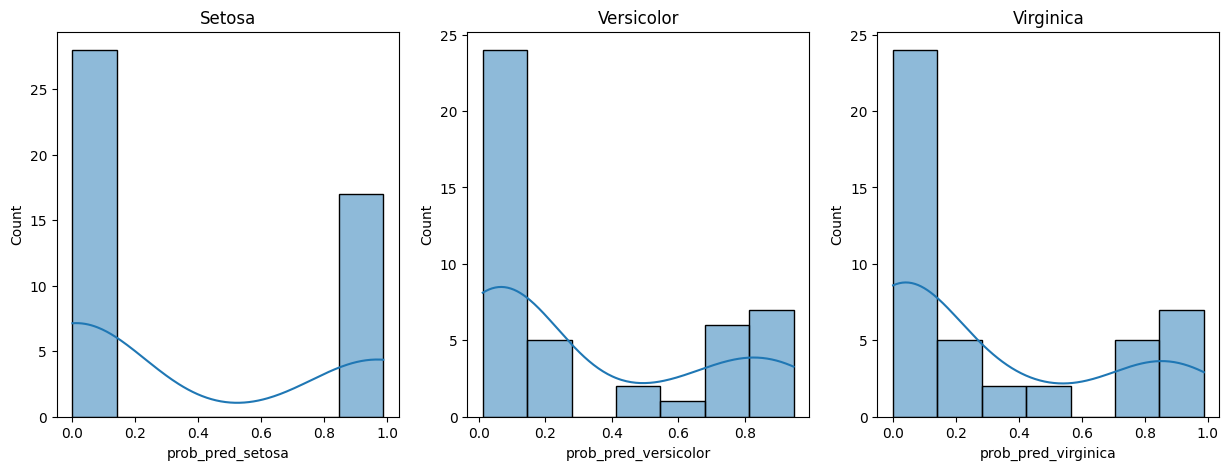

In [231]:
import seaborn as sns
import matplotlib.pyplot as plt

# Crear una figura y ejes para los subgráficos
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

sns.histplot(data=DF_setosa, x="prob_pred_setosa", kde=True,ax=axs[0])
axs[0].set_title('Setosa')
sns.histplot(data=DF_versi, x="prob_pred_versicolor", kde=True,ax=axs[1])
axs[1].set_title('Versicolor')
sns.histplot(data=DF_virginica, x="prob_pred_virginica", kde=True,ax=axs[2])
axs[2].set_title('Virginica')

plt.show()

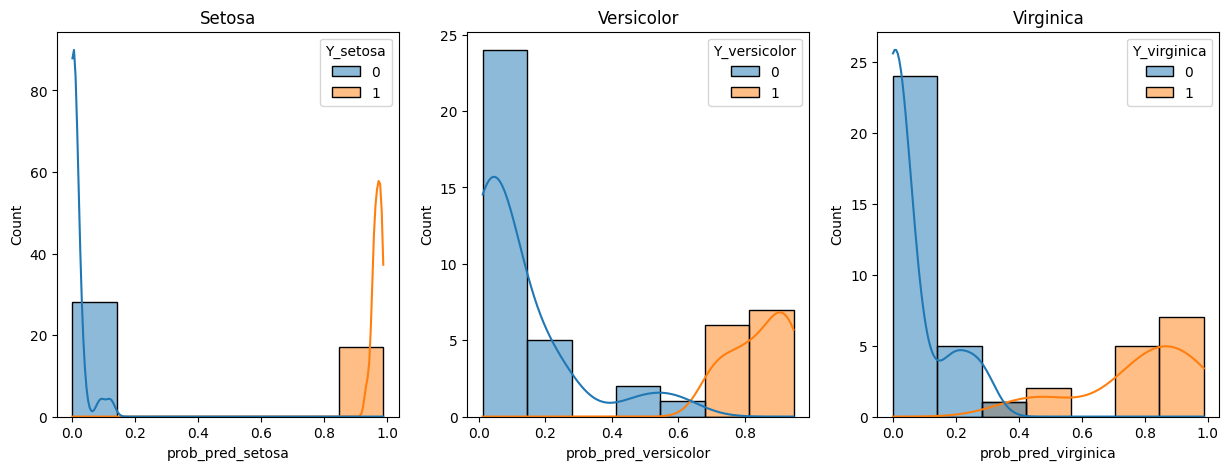

In [237]:
### Histigrama suavizado teniendo en cuenta el resultado real


fig, axs = plt.subplots(1, 3, figsize=(15, 5))

sns.histplot(data=DF_setosa, x="prob_pred_setosa", hue="Y_setosa",kde=True,ax=axs[0])
axs[0].set_title('Setosa')
sns.histplot(data=DF_versi, x="prob_pred_versicolor",hue="Y_versicolor", kde=True,ax=axs[1])
axs[1].set_title('Versicolor')
sns.histplot(data=DF_virginica, x="prob_pred_virginica", hue="Y_virginica",kde=True,ax=axs[2])
axs[2].set_title('Virginica')

plt.show()


### INDICADORES

### Matrices de confusion por especie

In [259]:
from sklearn.metrics import confusion_matrix

matriz_conf=confusion_matrix(y_test, modelo_log.predict(X_test))
matriz_conf

array([[17,  0,  0],
       [ 0, 13,  0],
       [ 0,  2, 13]], dtype=int64)

Matrices de confusión

\begin{pmatrix}
TN & FP \\
FN &TP \\
\end{pmatrix}

Matriz para setosa


\begin{pmatrix}
26 &  0 \\
2 &  17 \\
\end{pmatrix}


Indicadores para setosa



\begin{equation*}
Precisión= \frac{17}{17}=1
\end{equation*}

\begin{equation*}
Sensibilidad= \frac{17}{19}=0.89
\end{equation*}

\begin{equation*}
Especificidad= \frac{26}{26}=1
\end{equation*}

\begin{equation*}
Exactitud = \frac{43}{45}=0.95
\end{equation*}

In [266]:
43/45

0.9555555555555556

Matriz para versicolor

\begin{pmatrix}
30 &  2 \\
 0 &  13 \\
\end{pmatrix}

indicadores versicolor



\begin{equation*}
Precisión= \frac{13}{15}=0.86
\end{equation*}

\begin{equation*}
Sensibilidad= \frac{13}{13}=1
\end{equation*}

\begin{equation*}
Especificidad= \frac{30}{32}=0.9375
\end{equation*}

\begin{equation*}
Exactitud = \frac{43}{45}=0.95
\end{equation*}

Matriz virginica

\begin{pmatrix}
30 &  0 \\
2 &  13 \\
\end{pmatrix}

Indicadores de virginica

\begin{equation*}
Precisión= \frac{13}{13}=1
\end{equation*}

\begin{equation*}
Sensibilidad= \frac{13}{15}=0.86
\end{equation*}

\begin{equation*}
Especificidad= \frac{30}{30}=1
\end{equation*}

\begin{equation*}
Exactitud = \frac{43}{45}=0.95
\end{equation*}

## CURVAS ROC

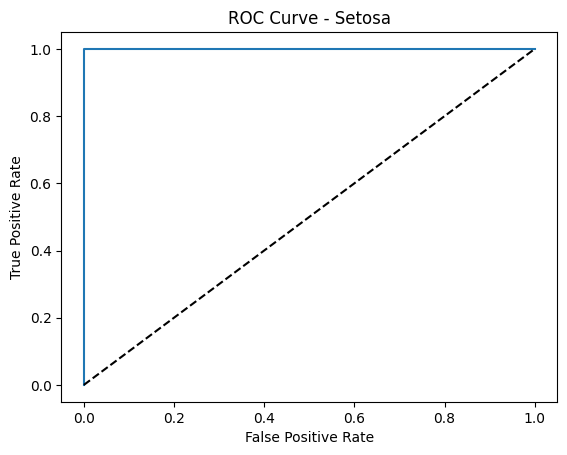

In [254]:
### Curva ROC

from sklearn.metrics import roc_curve

### Graficamos la curva ROC

fpr, tpr, thresholds = roc_curve(y_test_setosa, modelo_log.predict_proba(X_test)[:,0])

plt.plot(fpr, tpr, label='ROC curve')
plt.plot([0, 1], [0, 1], 'k--', label='Random guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Setosa')

plt.show()

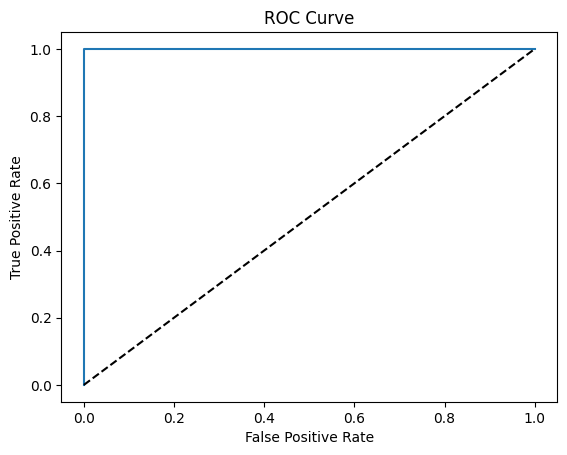

In [249]:
### Curva ROC

from sklearn.metrics import roc_curve

### Graficamos la curva ROC

fpr, tpr, thresholds = roc_curve(y_test_versicolor, modelo_log.predict_proba(X_test)[:,1])

plt.plot(fpr, tpr, label='ROC curve')
plt.plot([0, 1], [0, 1], 'k--', label='Random guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve- versicolor')

plt.show()

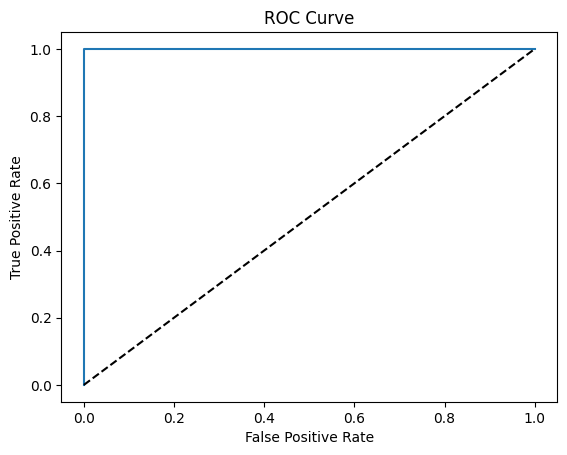

In [250]:
### Curva ROC

from sklearn.metrics import roc_curve

### Graficamos la curva ROC

fpr, tpr, thresholds = roc_curve(y_test_virginica, modelo_log.predict_proba(X_test)[:,2])

plt.plot(fpr, tpr, label='ROC curve')
plt.plot([0, 1], [0, 1], 'k--', label='Random guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve- Virginica')

plt.show()